### ocr 光学字符识别（Optical Character Recognition） 我们先做一个基础班：识别数字 

In [1]:
# 图片虽然是二维的数据 但是每行并不是一个样本的多个特性 
# 每个图片是一个样本 里面的各个点都是其特征 所以我们可以把28*28的点 变成1*784的点（在Excel里画图演示）
# 图片的每一个像素点都是一个特征
# 每一个图片是一个样本

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

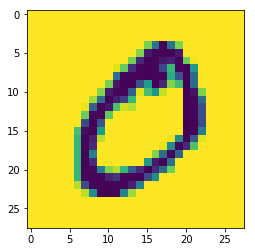

In [11]:
data = plt.imread('./digits/0/0_1.bmp')
data
plt.imshow(data)
data.shape
data = data.flatten()  # 把图片扁平化 变成一行
data.shape
plt.imshow(data.reshape(28,28))  # 要显示的时候 还是需要把一行的值 变成28*28

In [15]:
# 读取所有的样本 分成 训练数据 和 测试数据
# 训练数据集
X_train = []
y_train = []
# 测试数据集
X_test = []
y_test = []

for i in range(10):
    for j in range(1,501):
        # print('./digits/%d/%d_%d.bmp'%(i,i,j))
        # 根据路径 读取数据 然后 把28*28的形状 变成1行的形状
        data = plt.imread('./digits/%d/%d_%d.bmp'%(i,i,j)).flatten()
        # 目标值就是 文件夹的名字 也就在i
        target = i
        # 前490个都用来训练 后10个用来测试
        if j<=490:
            X_train.append(data)
            y_train.append(target)
        else:
            X_test.append(data)
            y_test.append(target)
        

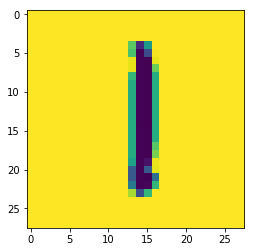

In [21]:
X_train[780]
plt.imshow(X_train[780].reshape(28,28))

In [22]:
# 获取模型 判断是那个数字 是分类
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [26]:
len(X_train)

4900

In [27]:
# 训练
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
# 预测 传入测试的特征值 根据模型 返回 预测的结果
y_ = knn.predict(X_test)
y_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 9, 4, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 4, 8, 8, 8,
       8, 8, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [31]:
knn.score(X_test,y_test)

0.94

In [34]:
len(X_test)

100

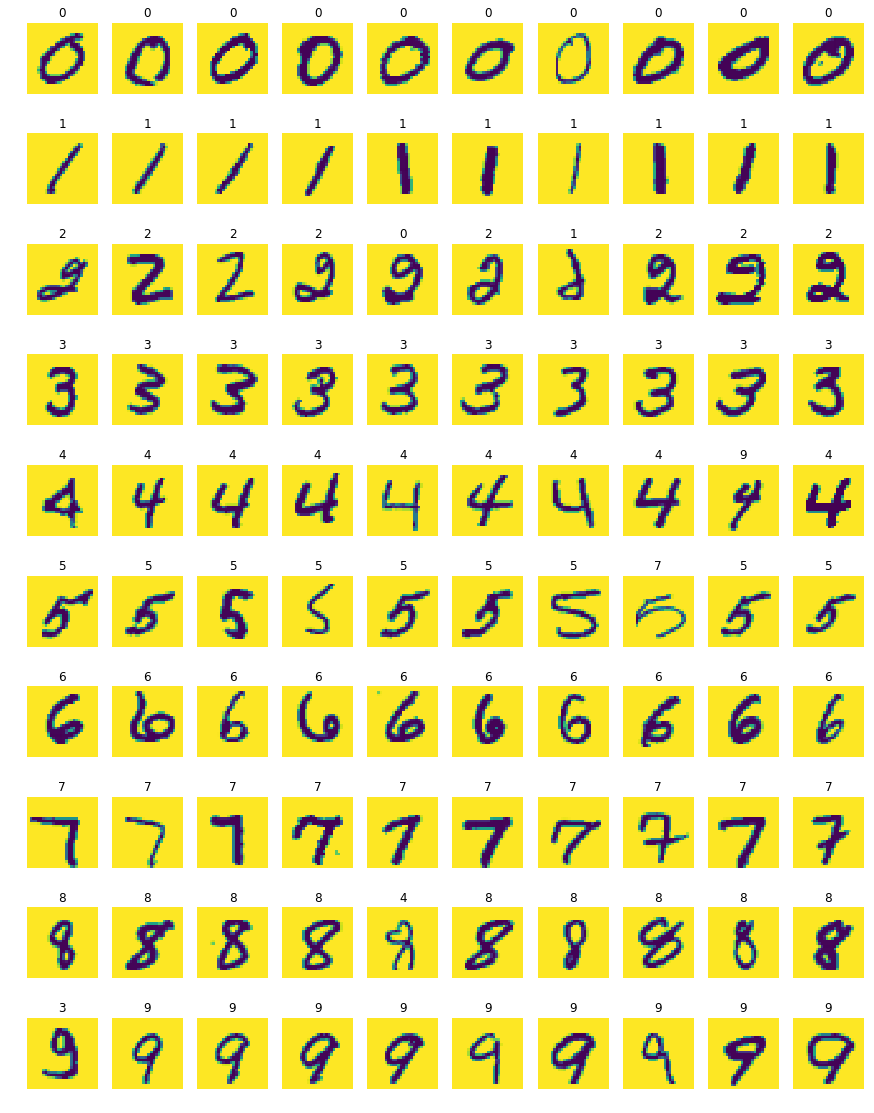

In [40]:
# 把图片绘制出来 把 预测结果作为子画布的题目
plt.figure(figsize=(15,20))
index = 1
for i in range(10):
    for j in range(10):
        axes = plt.subplot(10,10,index)
        # 传入测试数据 按照索引从X_test中获取数据 然后变回28*28的形状
        plt.imshow(X_test[index-1].reshape(28,28))
        axes.axis('off')  # 隐藏坐标轴
        # 把真实数据作为坐标系的标题
        axes.set_title(y_[index-1])
        index += 1